In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis as mda
import scipy
from matplotlib.lines import Line2D

from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT', low_mem=True)
wt = wt_1.rg(full=True)
d4_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/D4', low_mem=True)
d4 = d4_1.rg(full=True)
d7_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/7D_WT',low_mem=True)
d7 = d7_1.rg(full=True)
d12_1 = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/12D_D4',low_mem=True)
d12 = d12_1.rg(full=True)

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


In [3]:
# 1.0
wt_1_t = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT', low_mem=True)
wt_1_t.rg()
d4_1_t = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/D4', low_mem=True)
d4_1_t.rg()
d7_1_t = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/7D_WT',low_mem=True)
d7_1_t.rg()
d12_1_t = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/12D_D4',low_mem=True)
d12_1_t.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [4]:
# 1.0
wt_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/WT', low_mem=True)
wt_1_n.rg()
d4_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/D4', low_mem=True)
d4_1_n.rg()
d7_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/7D_WT', low_mem=True)
d7_1_n.rg()
d12_1_n = lmp.LMP(md_dir='/home/adria/data/real_final/HPS/1.0/12D_D4', low_mem=True)
d12_1_n.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

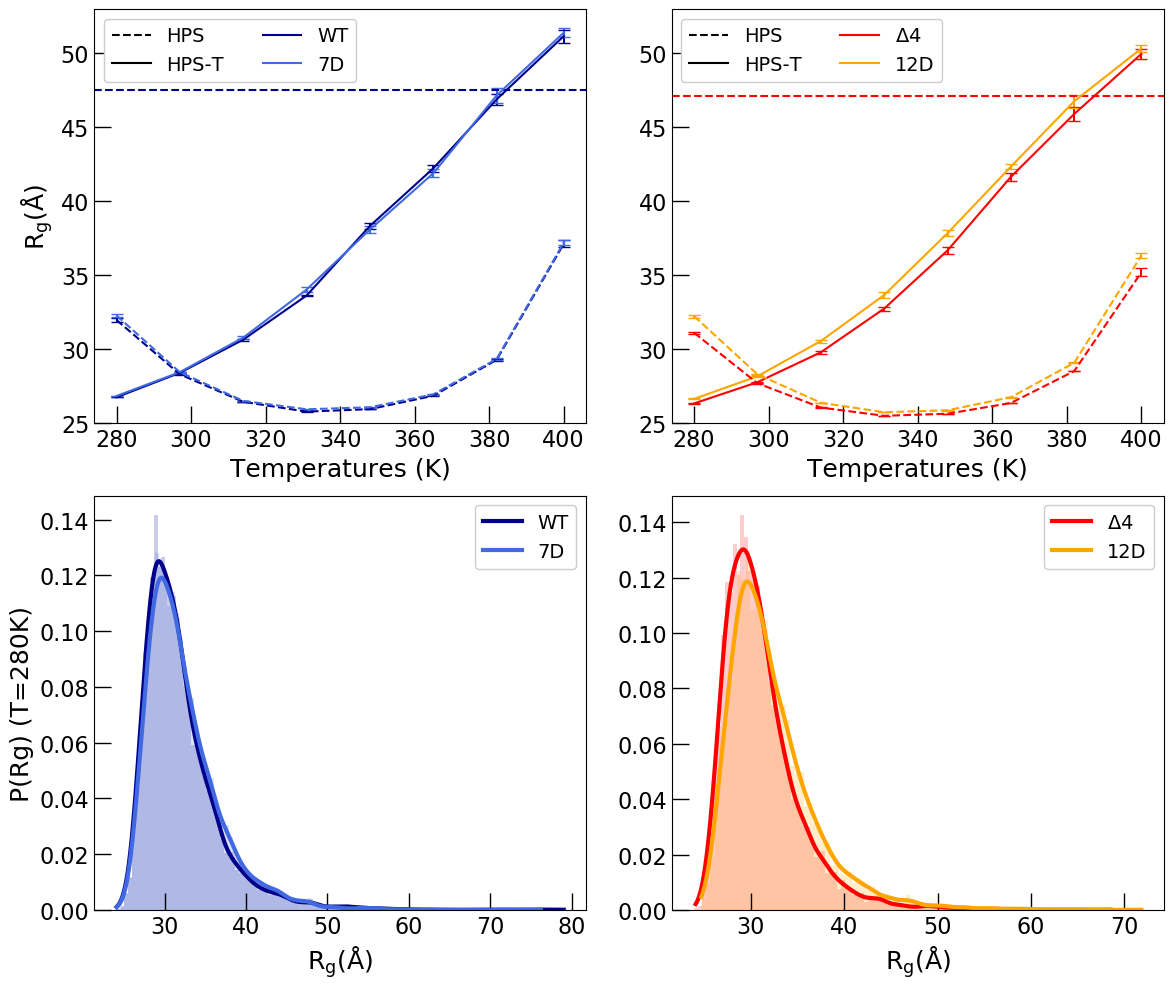

In [19]:
fig, axs = plt.subplots(2,2, figsize=(12,10))

la = axs[0][0].errorbar(wt_1_n.temperatures, wt_1_n.c_rg[0], yerr=wt_1_n.c_rg[1], color=C_W, label='WT')
lb = axs[0][0].errorbar(d7_1_n.temperatures, d7_1_n.c_rg[0], yerr=d7_1_n.c_rg[1], color=C_7, label='7D')
axs[0][0].errorbar(wt_1_t.temperatures, wt_1_t.c_rg[0], yerr=wt_1_t.c_rg[1], color=C_W, ls='--')
axs[0][0].errorbar(d7_1_t.temperatures, d7_1_t.c_rg[0], yerr=d7_1_t.c_rg[1], color=C_7, ls='--')
axs[0][0].set_ylabel("$\mathrm{R_g (\AA)}$", fontsize=18)
axs[0][0].set_xlabel("Temperatures (K)", fontsize=18)
axs[0][0].axhline(wt_1.rw_rg(), color=C_W, ls='--')
axs[0][0].set_ylim(25,53)
# l1 = axs[0][0].legend(loc='upper left')
# axs[0][0].add_artist(l1)
axs[0][0].legend([Line2D([0], [0], color='black', ls='--'), Line2D([0], [0], color='black'),Line2D([0], [0], color=C_W), Line2D([0], [0], color=C_7), ],
                 ["HPS", "HPS-T", "WT", "7D"], loc='upper left', ncol=2, fontsize=14)

la = axs[0][1].errorbar(d4_1_n.temperatures, d4_1_n.c_rg[0], yerr=d4_1_n.c_rg[1], color=C_4, label='D4')
lb = axs[0][1].errorbar(d12_1_n.temperatures, d12_1_n.c_rg[0], yerr=d12_1_n.c_rg[1], color=C_12, label='12D')
axs[0][1].errorbar(d4_1_t.temperatures, d4_1_t.c_rg[0], yerr=d4_1_t.c_rg[1], color=C_4, ls='--')
axs[0][1].errorbar(d12_1_t.temperatures, d12_1_t.c_rg[0], yerr=d12_1_t.c_rg[1], color=C_12, ls='--')
# l1 = axs[0][1].legend(loc='upper left')
# axs[0][1].add_artist(l1)
axs[0][1].legend([Line2D([0], [0], color='black', ls='--'), Line2D([0], [0], color='black'),Line2D([0], [0], color=C_4), Line2D([0], [0], color=C_12), ],
                 ["HPS", "HPS-T", "$\Delta$4", "12D"], loc='upper left', ncol=2, fontsize=14)
axs[0][1].set_xlabel("Temperatures (K)", fontsize=18)
axs[0][1].axhline(d4_1.rw_rg(), color=C_4, ls='--')
axs[0][1].set_ylim(25,53)

T=0

kde_scipy = scipy.stats.gaussian_kde(wt_1.c_rg[T][0])
x = np.linspace(wt_1.c_rg[T][0].min(), wt_1.c_rg[T][0].max(), 1000)
p = axs[1][0].plot(x, kde_scipy(x),color=C_W, lw=3, label='WT')
axs[1][0].hist(wt_1.c_rg[T][0], bins='auto', alpha=0.2, density=True, color=C_W)
axs[1][0].set_ylabel("P(Rg)", fontsize=18)
axs[1][0].set_xlabel("Rg", fontsize=18)
axs[1][0].legend()

kde_scipy = scipy.stats.gaussian_kde(d7_1.c_rg[T][0])
x = np.linspace(d7_1.c_rg[T][0].min(), d7_1.c_rg[T][0].max(), 1000)
p = axs[1][0].plot(x, kde_scipy(x),color=C_7,  lw=3, label='7D')
axs[1][0].hist(d7_1.c_rg[T][0], bins='auto', alpha=0.2, density=True, color=C_7)
axs[1][0].set_ylabel("P(Rg) (T=280K)", fontsize=18)
axs[1][0].set_xlabel("$\mathrm{R_g (\AA)}$", fontsize=18)
axs[1][0].legend(fontsize=14)

kde_scipy = scipy.stats.gaussian_kde(d4_1.c_rg[T][0])
x = np.linspace(d7_1.c_rg[T][0].min(), d4_1.c_rg[T][0].max(), 1000)
p = axs[1][1].plot(x, kde_scipy(x),color=C_4,  lw=3, label='$\Delta$4')
axs[1][1].hist(d4_1.c_rg[T][0], bins='auto', alpha=0.2, density=True, color=C_4)
axs[1][1].legend()

kde_scipy = scipy.stats.gaussian_kde(d12_1.c_rg[T][0])
x = np.linspace(d12_1.c_rg[T][0].min(), d12_1.c_rg[T][0].max(), 1000)
p = axs[1][1].plot(x, kde_scipy(x),color=C_12, lw=3, label='12D')
axs[1][1].hist(d12_1.c_rg[T][0], bins='auto', alpha=0.2, density=True, color=C_12)
axs[1][1].set_xlabel("$\mathrm{R_g (\AA)}$", fontsize=18)
axs[1][1].legend(fontsize=14)

fig.tight_layout()